In [52]:
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
import ggplot
import os
import pandas as pd
%matplotlib inline

scores = {}
scores['MCAR'] = {}
scores['MCAR']['0.1'] = []
scores['MCAR']['0.2'] = []
scores['MCAR']['0.3'] = []
scores['MCAR']['0.4'] = []
scores['MCAR']['0.5'] = []

scores['MAR'] = {}
scores['MNAR'] = {}

for filename in os.listdir('./data/scores/'):
    score = pkl.load(open('./data/scores/' + filename, 'rb'))
    if filename.startswith('MCAR'):
        if filename.split('_')[1] not in scores['MCAR']:
            scores['MCAR'][filename.split('_')[1]] = []
        for key, value in score.iteritems():
            scores['MCAR'][filename.split('_')[1]].append(value)
    elif filename.startswith('MAR'):
        if filename.split('_')[2] not in scores['MAR']:
            scores['MAR'][filename.split('_')[2]] = []
        for key, value in score.iteritems():
             scores['MAR'][filename.split('_')[2]].extend(value)
#         if 
#         scores['MAR'].append(score)
    else:
        if filename.split('_')[3] not in scores['MNAR']:
            scores['MNAR'][filename.split('_')[3]] = []
        for key, value in score.iteritems():
             scores['MNAR'][filename.split('_')[3]].extend(value)

In [43]:
sns.set_style("whitegrid")

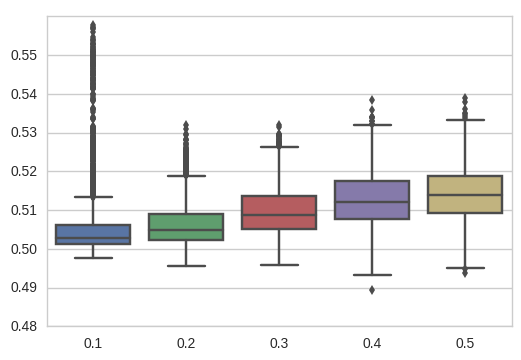

In [44]:
mcar = {'0.1': [], '0.2': [], '0.3': [], '0.4': [], '0.5': []}

for missing in scores['MCAR']:
    for results in scores['MCAR'][missing]:
        mcar[missing].extend(results['rfc'])
        
mcar_df = pd.DataFrame.from_dict(mcar)
mcar_df.to_csv('./data/prediction_scores/mcar.csv')
sns.boxplot(mcar_df)

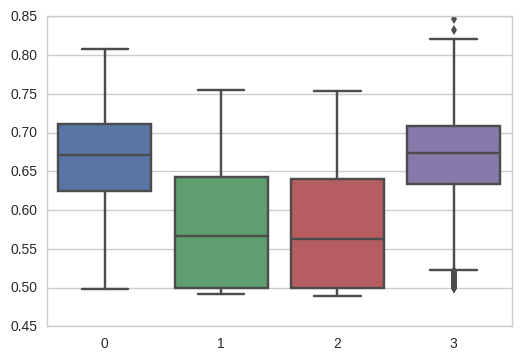

In [45]:
mar_df = pd.DataFrame.from_dict(scores['MAR'])
mar_df.to_csv('./data/prediction_scores/mar.csv')

sns.boxplot(mar_df)

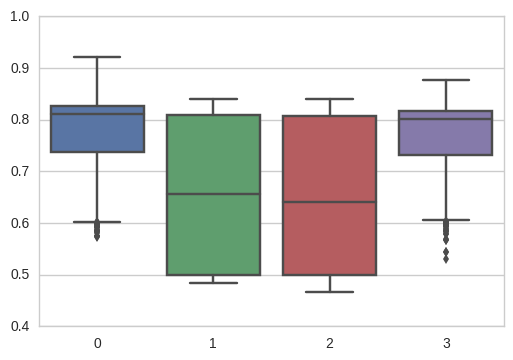

In [46]:
mnar_df = pd.DataFrame.from_dict(scores['MNAR'])
mnar_df.to_csv('./data/prediction_scores/mnar.csv')
sns.boxplot(mnar_df)

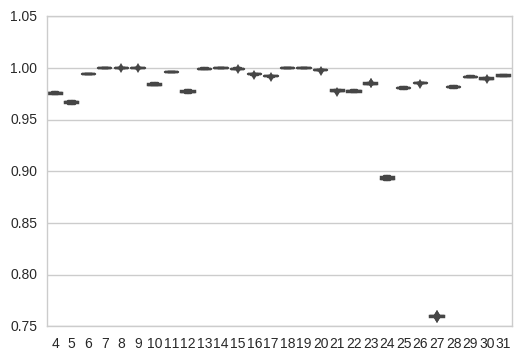

In [47]:
score = pkl.load(open('./data/all_patients/all_patients_vals_scores.p', 'rb'))
#print(score) 
rfc_dict = {}
for key in score:
    rfc_dict[key] = score[key]['rfc']

real_df = pd.DataFrame.from_dict(rfc_dict)
real_df.to_csv('./data/prediction_scores/real28.csv')
sns.boxplot(real_df)

{3: {'rfc': [0.67107854154099844, 0.67340456020419848, 0.67270170421440867, 0.66970606656504206, 0.67136437807698812, 0.67062204764229016, 0.67585840712893042, 0.66949209452499059, 0.6748101335416955, 0.66761595763463788], 'sgd': [0.5, 0.5, 0.5, 0.4999931467419611, 0.5, 0.5, 0.5, 0.50003865182436613, 0.5, 0.50003865182436613]}, 4: {'rfc': [0.55999926045145454, 0.55451608163726063, 0.56399910586545388, 0.55996929467627143, 0.55529133459637481, 0.5512086792153561, 0.55459621309069507, 0.55183334179858778, 0.56742186920201676, 0.57687760196256177], 'sgd': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]}, 5: {'rfc': [0.50759754809728264, 0.51122801515955585, 0.51121032543728451, 0.51348894928410238, 0.51978772082930402, 0.51662359257837709, 0.51621622027287528, 0.51255605755064082, 0.5139268313553268, 0.5103343320748891], 'sgd': [0.5, 0.5, 0.5, 0.49999410342590955, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]}, 6: {'rfc': [0.90310661297117634, 0.90381702678898357, 0.90530867489953282, 0.90316384496564

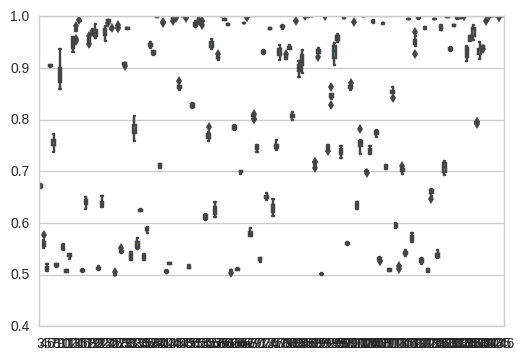

In [48]:
score = pkl.load(open('./data/all_patients/all_patients_all_scores.p', 'rb'))
print(score) 
rfc_dict = {}
for key in score:
    rfc_dict[key] = score[key]['rfc']
    
real_df = pd.DataFrame.from_dict(rfc_dict)
real_df.to_csv('./data/all_patients/all_labs.csv')

sns.boxplot(real_df)

In [94]:
import math
# MCAR
mcar_scores = pd.DataFrame(columns=['Method', 'Percent Missing', 'Trial', 'MSE'])

i = 0
for filename in os.listdir('/media/brett/Drive/imputation/output'):
    if filename.startswith('MCAR') and filename.split('.')[-1] == 'p':
        print(filename)
        missing = filename.split('_')[1]
        trial = filename.split('_')[2]
        
        scores = pkl.load(open('/media/brett/Drive/imputation/output/' + filename, 'rb'))
        for s in scores:
            if len(scores[s]) > 0:
                rmse = math.sqrt(float(scores[s][0])) * (1/math.sqrt(float(missing)))
                mcar_scores.loc[i] = [s, missing, trial, rmse]
                i += 1

for filename in os.listdir('/media/brett/Drive/imputation/output_r'):
    if filename.startswith('R_MCAR'):
        print(filename)
        missing = filename.split('_')[2]
        trial = filename.split('_')[3]
        scores = pd.read_csv('/media/brett/Drive/imputation/output_r/' + filename)
        scores.columns = ['Method', 'RMSE']
        
        
        for index, row in scores.iterrows():
            mcar_scores.loc[i] = ['r_' + row['Method'], missing, trial, row['RMSE']]
            i += 1
                
print(mcar_scores.head())
mcar_scores.to_csv('./output/imputation_scores/mcar.csv')

MCAR_0.1_0_0_None.p
MCAR_0.1_1_0_None.p
MCAR_0.1_2_0_None.p
MCAR_0.1_3_0_None.p
MCAR_0.1_4_0_None.p
MCAR_0.1_5_0_None.p
MCAR_0.1_6_0_None.p
MCAR_0.1_7_0_None.p
MCAR_0.1_8_0_None.p
MCAR_0.1_9_0_None.p
MCAR_0.2_0_0_None.p
MCAR_0.2_1_0_None.p
MCAR_0.2_2_0_None.p
MCAR_0.2_3_0_None.p
MCAR_0.2_4_0_None.p
MCAR_0.2_5_0_None.p
MCAR_0.2_6_0_None.p
MCAR_0.2_7_0_None.p
MCAR_0.2_8_0_None.p
MCAR_0.2_9_0_None.p
MCAR_0.3_0_0_None.p
MCAR_0.3_1_0_10000.p
MCAR_0.3_2_0_None.p
MCAR_0.3_3_0_None.p
MCAR_0.3_4_0_None.p
MCAR_0.3_5_0_None.p
MCAR_0.3_6_0_None.p
MCAR_0.3_7_0_None.p
MCAR_0.3_8_0_None.p
MCAR_0.3_9_0_None.p
MCAR_0.4_0_0_None.p
MCAR_0.4_1_0_None.p
MCAR_0.4_2_0_None.p
MCAR_0.4_3_0_None.p
MCAR_0.4_4_0_None.p
MCAR_0.4_5_0_None.p
MCAR_0.4_6_0_None.p
MCAR_0.4_7_0_None.p
MCAR_0.4_8_0_None.p
MCAR_0.4_9_0_None.p
MCAR_0.5_0_0_None.p
MCAR_0.5_1_0_None.p
MCAR_0.5_2_0_None.p
MCAR_0.5_3_0_None.p
MCAR_0.5_4_0_None.p
MCAR_0.5_5_0_None.p
MCAR_0.5_6_0_None.p
MCAR_0.5_7_0_None.p
MCAR_0.5_8_0_None.p
MCAR_0.5_9_0_None.p

In [54]:
import pickle as pkl

mnar_scores = pd.DataFrame(columns=['Method', 'Feature', 'Quartile', 'MSE'])

# MAR
i = 0
for filename in os.listdir('/media/brett/Drive/imputation/output'):
    if filename.startswith('MAR') and filename.split('.')[-1] == 'p':
        feature = filename.split('_')[1]
        quartile = filename.split('_')[2]
        
        scores = pkl.load(open('/media/brett/Drive/imputation/output/' + filename, 'rb'))
        for s in scores:
            if len(scores[s]) > 0:
                mnar_scores.loc[i] = [s, feature, quartile, scores[s][0]]
                i += 1
        
        
# this is really MNAR***
print(mnar_scores.head())
mnar_scores.to_csv('./output/imputation_scores/mnar.csv')

                   Method Feature Quartile       MSE
0                knn_6000      10        0  0.011623
1                 si_s_32      10        0  0.009283
2                  random      10        0  0.015204
3  MICE_col_lambda_reg_25      10        0  0.011589
4           simple_median      10        0  0.011668


In [57]:
mar_scores = pd.DataFrame(columns=['Method', 'FeatureA', 'FeatureB', 'Quartile', 'MSE'])

i = 0
for filename in os.listdir('/media/brett/Drive/imputation/output'):
    if filename.startswith('MNAR') and filename.split('.')[-1] == 'p':
        feature1 = filename.split('_')[1]
        feature2 = filename.split('_')[2]
        quartile = filename.split('_')[3]
        
        scores = pkl.load(open('/media/brett/Drive/imputation/output/' + filename, 'rb'))
        for s in scores:
            if len(scores[s]) > 0:
                mar_scores.loc[i] = [s, feature1, feature2, quartile, scores[s][0]]
                i += 1
                
print(mar_scores.head())
mar_scores.to_csv('./output/imputation_scores/mar.csv')        

                   Method FeatureA FeatureB Quartile       MSE
0                knn_6000       10       11        0  0.004398
1                 si_s_32       10       11        0  0.003734
2                  random       10       11        0  0.009244
3  MICE_col_lambda_reg_25       10       11        0  0.004028
4           simple_median       10       11        0  0.004577
